In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x,y = make_blobs(n_samples=500,n_features=2,centers=2,cluster_std=2.5,random_state=1)

In [3]:
x.shape

(500, 2)

In [4]:
#x

In [5]:
#y

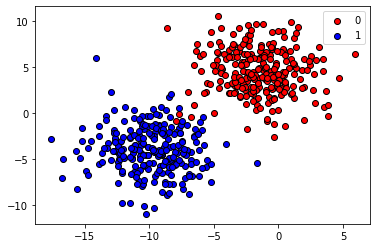

In [6]:
plt.scatter(x[y==0,0],x[y==0,1],c='red',label='0',edgecolors='k')
plt.scatter(x[y==1,0],x[y==1,1],c='blue',label='1',edgecolors='k')
plt.legend()
plt.show()

In [7]:
from sklearn.svm import SVC

In [8]:
#gamma=.01,10  ,It is area cloud of classes
#c=0.01,1  ,It is the margin distance of vector with classes ,If c is low = margin is more & if c is high = margin is low
clf = SVC(kernel='rbf',gamma=100)  #model assumes that data is non-linear separable
#clf = SVC(kernel='linear',c=0.01)   #model assumes that data is linear separable

In [9]:
clf.fit(x,y)

score = clf.score(x,y)

score

1.0

In [10]:
pred = clf.predict(x)
np.where(pred!=y)

(array([], dtype=int64),)

In [11]:
test = [-6,0.5]


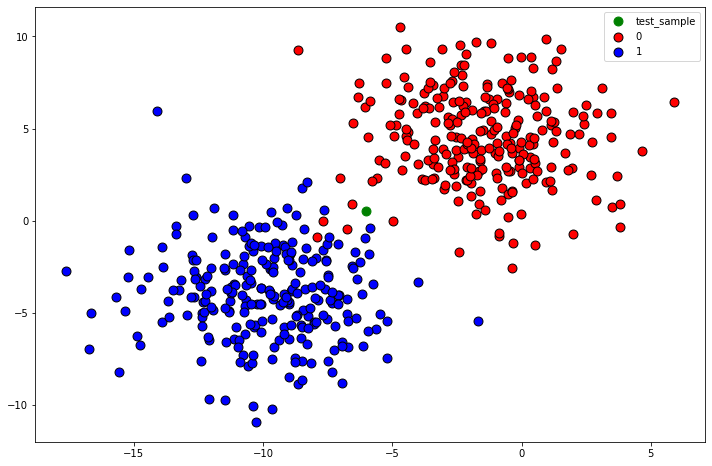

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(test[0],test[1],c='green',label='test_sample',s=80)

plt.scatter(x[y==0,0],x[y==0,1],c='red',label='0',edgecolors='k',s=80)
plt.scatter(x[y==1,0],x[y==1,1],c='blue',label='1',edgecolors='k',s=80)
plt.legend()
plt.show()

In [13]:
clf.predict([test])

array([0])

### Non-linear dataset

In [14]:
from sklearn.datasets import make_circles
#to avoid future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
x1,y1 = make_circles(n_samples=100,random_state=10,noise=.05)

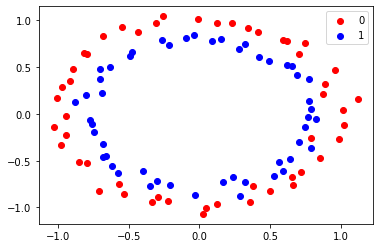

In [16]:
plt.scatter(x1[y1==0,0],x1[y1==0,1],c='red',label='0')
plt.scatter(x1[y1==1,0],x1[y1==1,1],c='blue',label='1')
plt.legend()
plt.show()

- RBF is used to work with non linear dataset

- Gamma is used when we use the RBF kernel. if we use linear kernel then we do not need gamma only we need C hypermeter.

- Gamma is a hyperparameter which we have to set before training model. Gamma decides the the region of a class

- if gamma is low then decision region of a class will be large

- if gamma is high then decision region of a class will be small

In [17]:
clf=SVC(kernel='rbf',gamma=10)

In [18]:
clf.fit(x1,y1)

SVC(gamma=10)

In [19]:
pred = clf.predict(x1)
np.where(pred!=y1)

(array([ 7, 44, 95], dtype=int64),)

In [20]:
clf.score(x1,y1)

0.97

In [21]:
test = [-0.5,0.5]


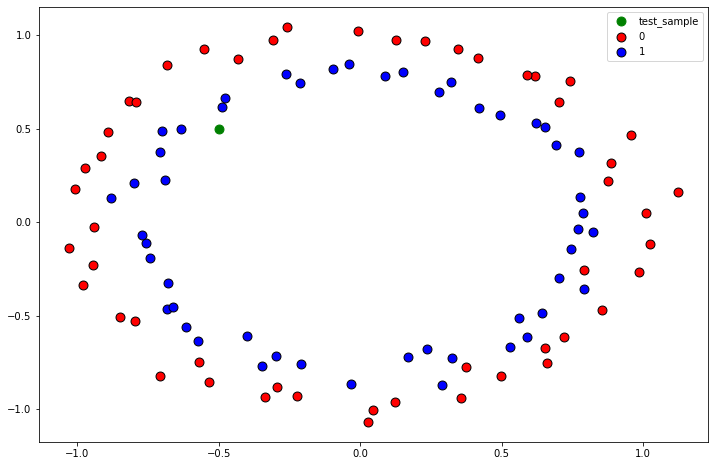

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(test[0],test[1],c='green',label='test_sample',s=80)

plt.scatter(x1[y1==0,0],x1[y1==0,1],c='red',label='0',edgecolors='k',s=80)
plt.scatter(x1[y1==1,0],x1[y1==1,1],c='blue',label='1',edgecolors='k',s=80)
plt.legend()
plt.show()

In [23]:
clf.predict([test])

array([1], dtype=int64)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg = LogisticRegression()
lg.fit(x1,y1)

LogisticRegression()

In [26]:
lg.score(x1,y1)

0.5

### When we have large amount of samples and features then how to select kernel value?

In [27]:
from sklearn.datasets import load_digits

In [28]:
d = load_digits()

In [29]:
X = d.data
y = d.target

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=12)

In [32]:
clf = SVC(kernel='rbf',gamma=10)

In [33]:
clf.fit(xtrain,ytrain)

SVC(gamma=10)

In [34]:
clf.score(xtrain,ytrain)

1.0

In [35]:
clf.score(xtest,ytest)

0.08055555555555556

In [36]:
#### large value of gamma leads to overfitting 

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
p = [{'kernel':['linear'],'C':[.01,1,10]},{'kernel':['rbf'],'gamma':[.001,.01,.1,10]}]

In [39]:
clf = GridSearchCV(SVC(),param_grid=p,cv=5,scoring='accuracy')

In [40]:
clf.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 1, 10], 'kernel': ['linear']},
                         {'gamma': [0.001, 0.01, 0.1, 10], 'kernel': ['rbf']}],
             scoring='accuracy')

In [41]:
clf.best_score_

0.9916448896631824

In [42]:
clf.best_params_

{'gamma': 0.001, 'kernel': 'rbf'}

In [43]:
clf1 = clf.best_estimator_

In [44]:
pred = clf1.predict(xtest)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(ytest,pred)

0.9944444444444445